In [3]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
sparksession = SparkSession.builder.appName('PySparkAssignment').getOrCreate()
sc = sparksession.sparkContext
input = 'C:\\Users\\s560018\\Documents\\BigData\\BigData_Source.csv'

In [4]:
salesinputdata = sparksession.read.format('csv').option('header','true').load(input)
salesinputdata.createOrReplaceTempView('Sales_info')
salesinputdata.show()


+-----------+---------------+---------+-------+---------------+--------+-------+-----------+-----------+--------------------+----------------+-------------+--------+----------+---------+---------+
|ORDERNUMBER|QUANTITYORDERED|PRICEEACH|  SALES|      ORDERDATE|MONTH_ID|YEAR_ID|PRODUCTLINE|PRODUCTCODE|        CUSTOMERNAME|           PHONE|         CITY|   STATE|POSTALCODE|  COUNTRY|TERRITORY|
+-----------+---------------+---------+-------+---------------+--------+-------+-----------+-----------+--------------------+----------------+-------------+--------+----------+---------+---------+
|      10107|             30|     95.7|   2871| 2/24/2003 0:00|       2|   2003|Motorcycles|   S10_1678|   Land of Toys Inc.|      2125557818|          NYC|      NY|     10022|      USA|       NA|
|      10121|             34|    81.35| 2765.9|  5/7/2003 0:00|       5|   2003|Motorcycles|   S10_1678|  Reims Collectables|      26.47.1555|        Reims|    NULL|     51100|   France|     EMEA|
|      10134|  

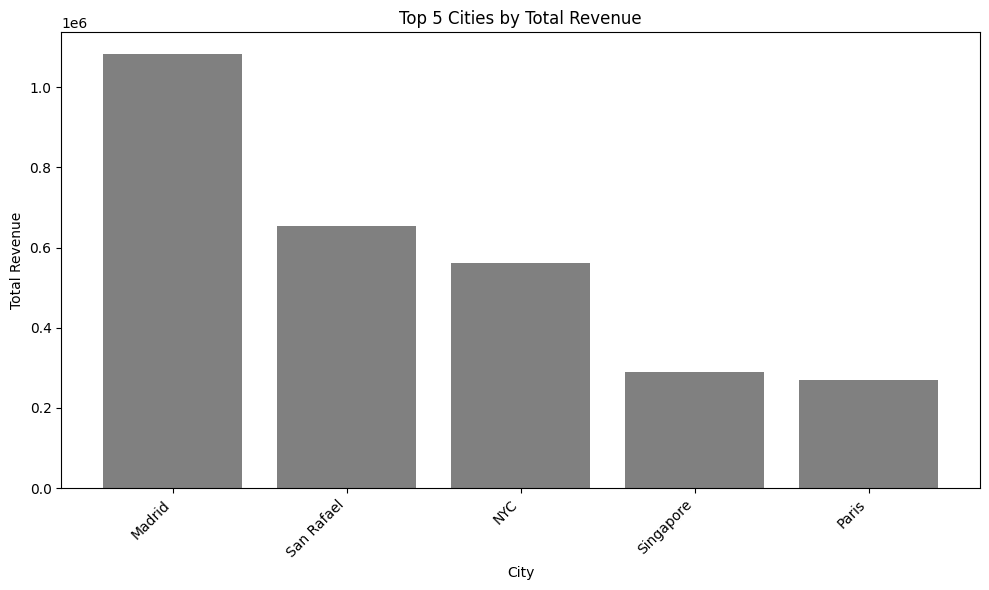

In [17]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
sparksession = SparkSession.builder.appName('PySparkAssignment').getOrCreate()
sc = sparksession.sparkContext
input = 'C:\\Users\\s560018\\Documents\\BigData\\BigData_Source.csv'

salesinputdata = sparksession.read.format('csv').option('header','true').load(input)
salesinputdata.createOrReplaceTempView('Sales_info')


# Total revenue query by city, selecting only the top 5 cities
top_5_revenue_by_city = sparksession.sql("""
    SELECT CITY, SUM(SALES) AS total_revenue
    FROM sales_info
    GROUP BY CITY
    ORDER BY total_revenue DESC
    LIMIT 5
""")

# Extracting data from the Spark DataFrame
cities = [row.CITY for row in top_5_revenue_by_city.collect()]
total_revenues = [row.total_revenue for row in top_5_revenue_by_city.collect()]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cities, total_revenues, color='grey')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Top 5 Cities by Total Revenue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


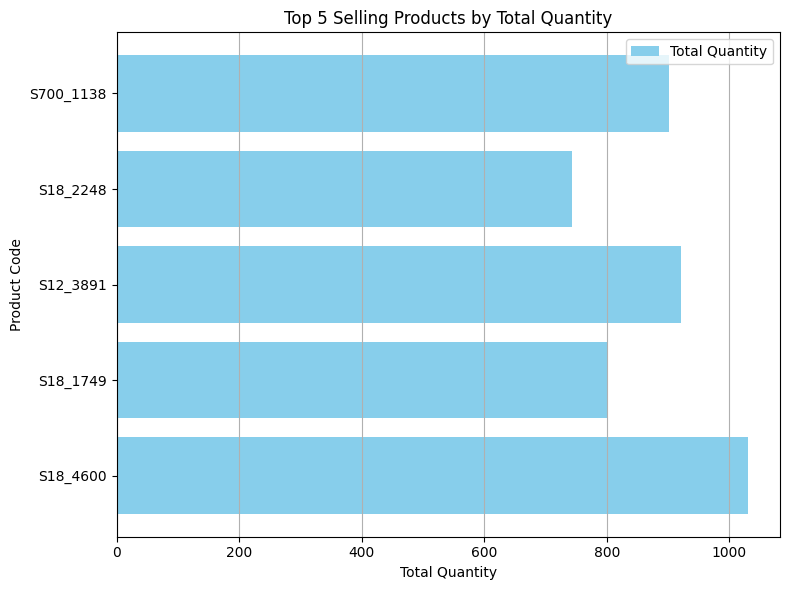

In [18]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
sparksession = SparkSession.builder.appName('PySparkAssignment').getOrCreate()
sc = sparksession.sparkContext
input = 'C:\\Users\\s560018\\Documents\\BigData\\BigData_Source.csv'

salesinputdata = sparksession.read.format('csv').option('header','true').load(input)
salesinputdata.createOrReplaceTempView('Sales_info')


# SQL query to aggregate sales data for each product
top_selling_products = spark.sql("""
    SELECT PRODUCTCODE, 
           SUM(QUANTITYORDERED) AS total_quantity  
    FROM Sales_info
    GROUP BY PRODUCTCODE
    LIMIT 5
""")

# Extracting data from the Spark DataFrame
product_codes = [row.PRODUCTCODE for row in top_selling_products.collect()]
total_quantity = [row.total_quantity for row in top_selling_products.collect()]


# Horizontal bar chart with decreased horizontal scale
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.barh(product_codes, total_quantity, color='skyblue', label='Total Quantity')
plt.xlabel('Total Quantity')
plt.ylabel('Product Code')
plt.title('Top 5 Selling Products by Total Quantity')
plt.legend()
plt.grid(axis='x')

# Show plots
plt.tight_layout()
plt.show()


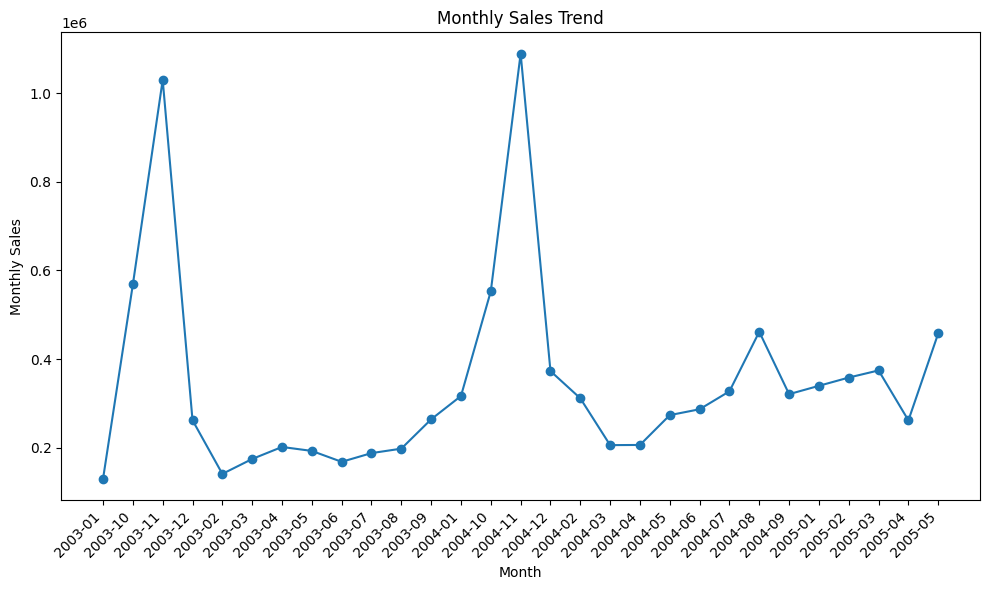

In [19]:
        import pyspark
        from pyspark.sql import SparkSession
        import pandas as pd
        sparksession = SparkSession.builder.appName('PySparkAssignment').getOrCreate()
        sc = sparksession.sparkContext
        input = 'C:\\Users\\s560018\\Documents\\BigData\\BigData_Source.csv'
        
        salesinputdata = sparksession.read.format('csv').option('header','true').load(input)
        salesinputdata.createOrReplaceTempView('Sales_info')
        
        
        # Query to calculate monthly sales
        monthly_sales_query = """
            SELECT YEAR_ID, MONTH_ID, SUM(SALES) AS monthly_sales
            FROM Sales_info
            GROUP BY YEAR_ID, MONTH_ID
            ORDER BY YEAR_ID, MONTH_ID
        """
        
        # Execute the query
        monthly_sales_trend = spark.sql(monthly_sales_query)
        
        # Extracting data from the Spark DataFrame
        years = [str(row.YEAR_ID) for row in monthly_sales_trend.collect()]
        months = [int(row.MONTH_ID) for row in monthly_sales_trend.collect()]
        monthly_sales = [row.monthly_sales for row in monthly_sales_trend.collect()]
        
        # Create a line plot
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(monthly_sales) + 1), monthly_sales, marker='o', linestyle='-')
        
        # Add labels and title
        plt.xlabel("Month")
        plt.ylabel("Monthly Sales")
        plt.title("Monthly Sales Trend")
        
        # Customize x-axis ticks to show months
        month_labels = ["{}-{:02d}".format(years[i], months[i]) for i in range(len(months))]
        plt.xticks(range(1, len(months) + 1), month_labels, rotation=45, ha='right')
        
        # Show the plot
        plt.tight_layout()
        plt.show()


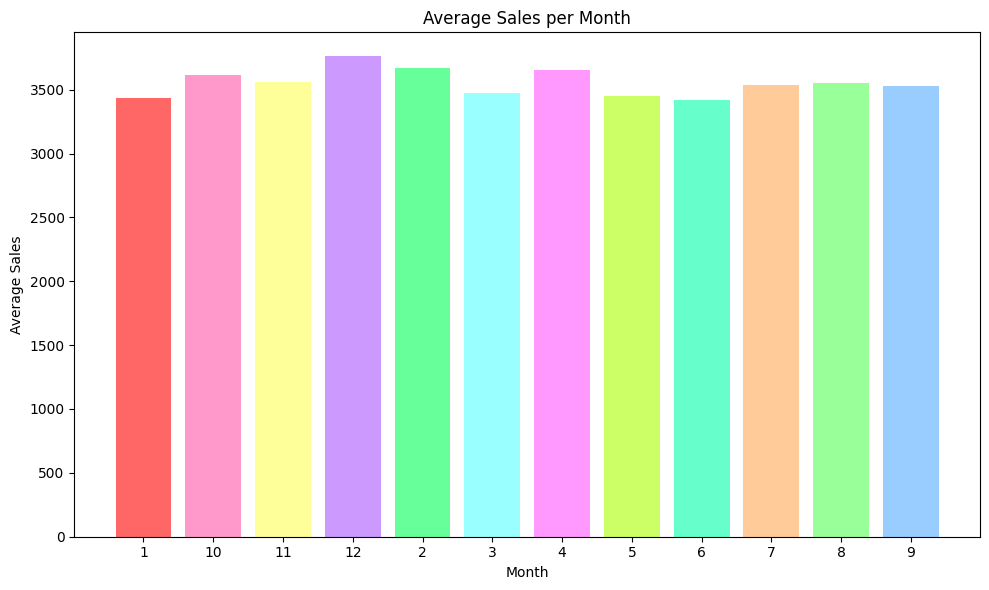

In [20]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
sparksession = SparkSession.builder.appName('PySparkAssignment').getOrCreate()
sc = sparksession.sparkContext
input = 'C:\\Users\\s560018\\Documents\\BigData\\BigData_Source.csv'

salesinputdata = sparksession.read.format('csv').option('header','true').load(input)
salesinputdata.createOrReplaceTempView('Sales_info')

# Define the SQL query to calculate average sales per month
average_sales_per_month = spark.sql("""
    SELECT MONTH_ID, AVG(SALES) AS average_sales
    FROM Sales_info
    GROUP BY MONTH_ID
    ORDER BY MONTH_ID
""")

# Extracting data from the Spark DataFrame
months = []
average_sales = []

for row in average_sales_per_month.collect():
    months.append(int(row.MONTH_ID))  # Convert to integer
    average_sales.append(row.average_sales)

# Define pastel colors
pastel_colors = ['#FF6666', '#FFCC99', '#99FF99', '#99CCFF', '#FF99CC', '#FFFF99', '#CC99FF', '#66FF99', '#99FFFF', '#FF99FF', '#CCFF66', '#66FFCC']

# Create a bar plot with pastel-colored bars
plt.figure(figsize=(10, 6))
plt.bar(months, average_sales, color=pastel_colors)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.title("Average Sales per Month")

# Customize x-axis ticks to show months
plt.xticks(range(1, len(months) + 1), months)

# Show the plot
plt.tight_layout()
plt.show()


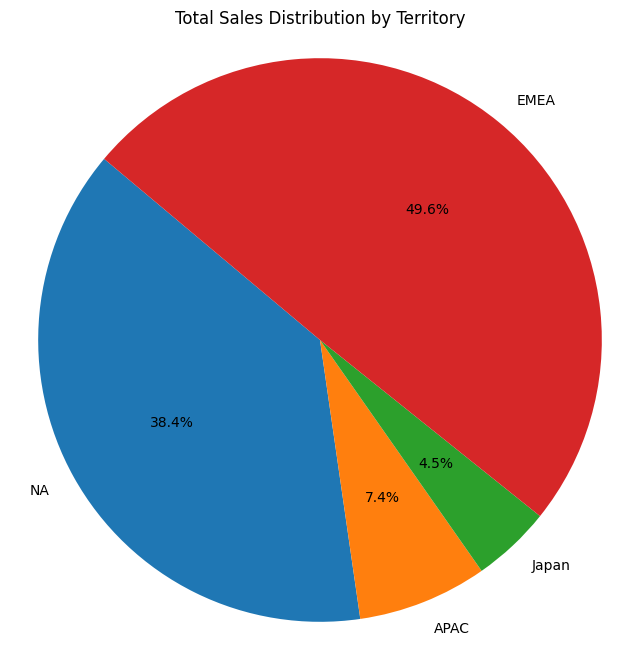

In [22]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
sparksession = SparkSession.builder.appName('PySparkAssignment').getOrCreate()
sc = sparksession.sparkContext
input = 'C:\\Users\\s560018\\Documents\\BigData\\BigData_Source.csv'

salesinputdata = sparksession.read.format('csv').option('header','true').load(input)
salesinputdata.createOrReplaceTempView('Sales_info')

# Define the SQL query to calculate total sales per territory
sales_performance_by_territory = spark.sql("""
    SELECT TERRITORY, SUM(SALES) AS total_sales
    FROM Sales_info
    GROUP BY TERRITORY
""")
        
# Extracting data from the Spark DataFrame
territories = [row.TERRITORY for row in sales_performance_by_territory.collect()]
total_sales = [row.total_sales for row in sales_performance_by_territory.collect()]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_sales, labels=territories, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Total Sales Distribution by Territory')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


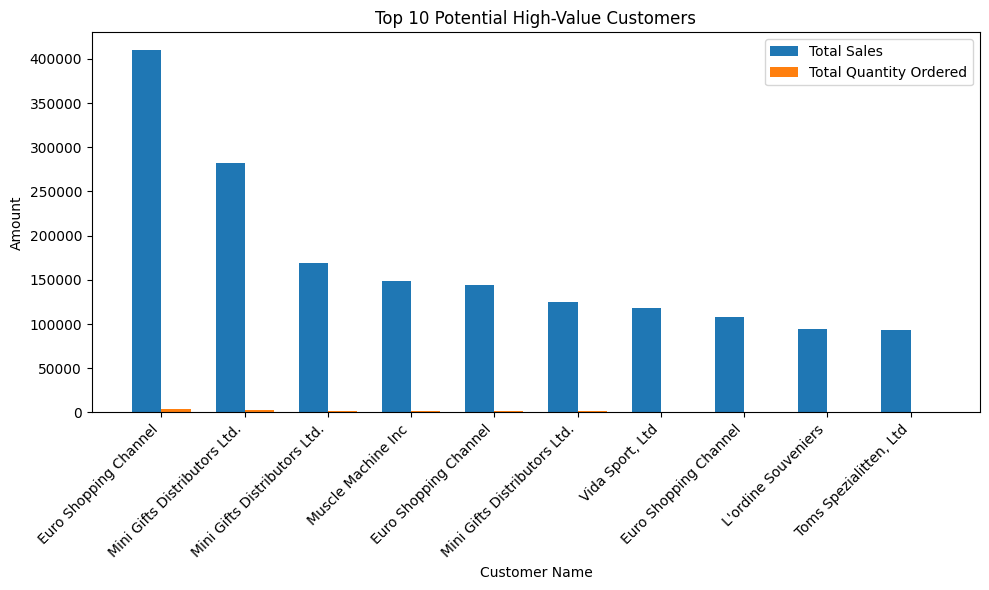

In [21]:

import numpy as np
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
sparksession = SparkSession.builder.appName('PySparkAssignment').getOrCreate()
sc = sparksession.sparkContext
input = 'C:\\Users\\s560018\\Documents\\BigData\\BigData_Source.csv'

salesinputdata = sparksession.read.format('csv').option('header','true').load(input)
salesinputdata.createOrReplaceTempView('Sales_info')


# Assuming 'Sales_info' view contains the necessary columns like CUSTOMERNAME, PRODUCTLINE, total_sales, total_quantity_ordered
vhigh_value_customers = spark.sql("SELECT CUSTOMERNAME, PRODUCTLINE, SUM(SALES) AS total_sales, SUM(QUANTITYORDERED) AS total_quantity_ordered FROM Sales_info GROUP BY CUSTOMERNAME, PRODUCTLINE ORDER BY total_sales DESC LIMIT 10")

# Extracting data from the Spark DataFrame
customer_names = [row.CUSTOMERNAME for row in vhigh_value_customers.collect()]
product_lines = [row.PRODUCTLINE for row in vhigh_value_customers.collect()]
total_sales = [row.total_sales for row in vhigh_value_customers.collect()]
total_quantity_ordered = [row.total_quantity_ordered for row in vhigh_value_customers.collect()]

# Set the positions of the bars on the x-axis
x = np.arange(len(customer_names))

# Set the width of the bars
width = 0.35

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for total sales
bars1 = ax.bar(x - width/2, total_sales, width, label='Total Sales')

# Plot the bars for total quantity ordered
bars2 = ax.bar(x + width/2, total_quantity_ordered, width, label='Total Quantity Ordered')

# Add labels and title
ax.set_xlabel('Customer Name')
ax.set_ylabel('Amount')
ax.set_title('Top 10 Potential High-Value Customers')
ax.set_xticks(x)
ax.set_xticklabels(customer_names, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


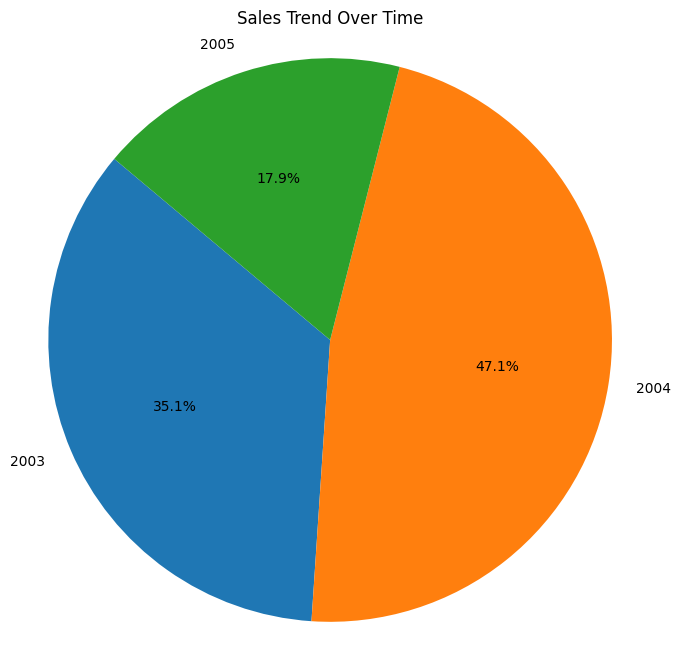

In [23]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import numpy as np
import pyspark
import pandas as pd
sparksession = SparkSession.builder.appName('PySparkAssignment').getOrCreate()
sc = sparksession.sparkContext
input = 'C:\\Users\\s560018\\Documents\\BigData\\BigData_Source.csv'

salesinputdata = sparksession.read.format('csv').option('header','true').load(input)
salesinputdata.createOrReplaceTempView('Sales_info')

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("SalesAnalysis") \
    .getOrCreate()

# Aggregate yearly sales from the Sales_info DataFrame
sales_trend_over_time = salesinputdata.groupBy('YEAR_ID').agg(F.sum('SALES').alias('yearly_sales')).orderBy('YEAR_ID')

# Extracting data from the Spark DataFrame
years = [row.YEAR_ID for row in sales_trend_over_time.collect()]
yearly_sales = [row.yearly_sales for row in sales_trend_over_time.collect()]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(yearly_sales, labels=years, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Sales Trend Over Time')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

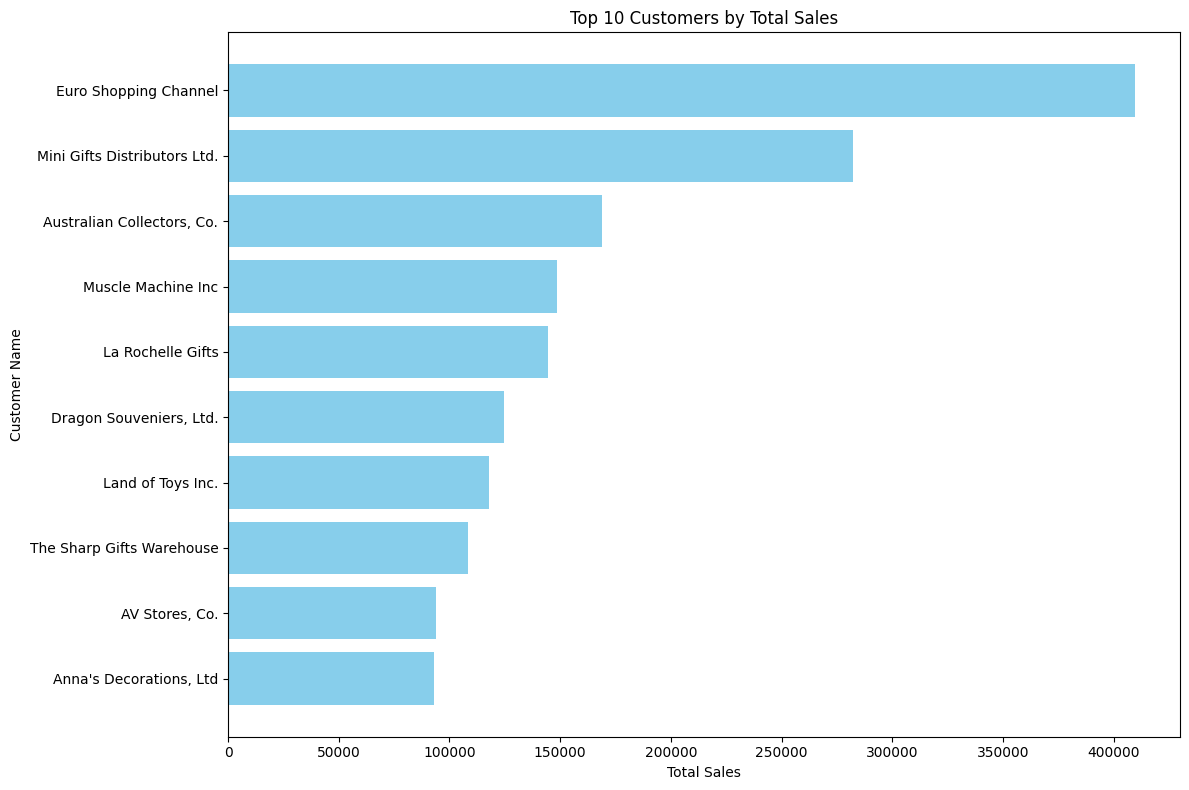

In [22]:
import matplotlib.pyplot as plt

import numpy as np
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
sparksession = SparkSession.builder.appName('PySparkAssignment').getOrCreate()
sc = sparksession.sparkContext
input = 'C:\\Users\\s560018\\Documents\\BigData\\BigData_Source.csv'

salesinputdata = sparksession.read.format('csv').option('header','true').load(input)
salesinputdata.createOrReplaceTempView('Sales_info')

# Query to get top 10 customers by total sales across all product lines
top_10_customers_query = """
    SELECT CUSTOMERNAME, SUM(SALES) AS total_sales
    FROM Sales_info
    GROUP BY CUSTOMERNAME
    ORDER BY total_sales DESC
    LIMIT 10
"""
# Assuming 'Sales_info' view contains the necessary columns like CUSTOMERNAME, PRODUCTLINE, total_sales, total_quantity_ordered
top_customer_sales = spark.sql("SELECT CUSTOMERNAME, PRODUCTLINE, SUM(SALES) AS total_sales, SUM(QUANTITYORDERED) AS total_quantity_ordered FROM Sales_info GROUP BY CUSTOMERNAME, PRODUCTLINE ORDER BY total_sales DESC LIMIT 10")

# Execute the query
top_10_customers_df = spark.sql(top_10_customers_query)

# Extracting data from the DataFrame for the top 10 customers
top_10_customer_names = [row.CUSTOMERNAME for row in top_10_customers_df.collect()]
top_10_total_sales = [row.total_sales for row in top_customer_sales.collect()]

# Create a horizontal bar plot for the top 10 customers
plt.figure(figsize=(12, 8))
plt.barh(top_10_customer_names, top_10_total_sales, color='skyblue')

# Add labels and title
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.title('Top 10 Customers by Total Sales')

# Show the plot
plt.gca().invert_yaxis()  # Invert y-axis to show the highest sales at the top
plt.tight_layout()
plt.show()